In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rappture

# FIXME: Should get this from the tool invoke script
import hublib.use
%use s4-1.0.0

In [2]:
deck = """
-- In a 1D pattern, the pattern should be specified only with rectangles.
-- The y-dimension of the rectangles is ignored.

S = S4.NewSimulation()
S:SetLattice({1,0}, {0,0}) -- 1D lattice
S:SetNumG(27)

-- Material definition
S:AddMaterial("Silicon", {12,0}) -- real and imag parts
S:AddMaterial("Vacuum", {1,0})

S:AddLayer(
    'AirAbove', --name
    0,          --thickness
    'Vacuum')   --background material
S:AddLayer('Slab', 0.5, 'Vacuum')
S:SetLayerPatternRectangle('Slab',        -- which layer to alter
                           'Silicon',     -- material in rectangle
                           {0,0},         -- center
                           0,             -- tilt angle (degrees)
                           {0.25, 0}) -- half-widths
S:AddLayerCopy('AirBelow', -- new layer name
               0,          -- thickness
               'AirAbove') -- layer to copy

-- E polarized along the grating periodicity direction
S:SetExcitationPlanewave(
    {0,0},  -- incidence angles (spherical coordinates: phi in [0,180], theta in [0,360])
    {0,0},  -- s-polarization amplitude and phase (in degrees)
    {1,0})  -- p-polarization amplitude and phase

--S:UsePolarizationDecomposition()

for freq=0.25,0.7,0.005 do
    S:SetFrequency(freq)

    -- backward should be zero
    forward,backward = S:GetPoyntingFlux('AirBelow', -- layer in which to get
                                         0)          -- z-offset
    print(freq .. '\t' .. forward);
end
"""

In [ ]:
#io.list_inputs()
#
# [option] 'input.phase(mode_option).choice(option)' Current=2 Units='' Label, Desc
# [deck] 'input.phase(parameter).group(input_deck).string(deck)' Current, Label, Desc

# io['#option'] = 

In [ ]:
# io.list_outputs()
# [curve_2] 'output.curve(2).component.xy'

# io['#curve_2'].display(options)
# io.display_all()


In [3]:
io = rappture.Tool("s4sim")
io['input.phase(mode_option).choice(option).current'] = 2
io['input.phase(parameter).group(input_deck).string(deck).current'] = deck

In [ ]:
# run the tool
io.run()

In [ ]:
#rappture.list_outputs(io)
#rappture.show_output(io['output.foo.bar'], **kwargs)ou

In [48]:
xy = io['output.curve(2).component.xy'].value

In [49]:
xy

'        0.25     0.908049\n       0.255     0.909058\n        0.26     0.910408\n       0.265     0.912114\n        0.27     0.914192\n       0.275     0.916657\n        0.28     0.919524\n       0.285     0.922804\n        0.29     0.926508\n       0.295     0.930645\n         0.3     0.935217\n       0.305      0.94022\n        0.31     0.945641\n       0.315     0.951456\n        0.32      0.95762\n       0.325     0.964066\n        0.33     0.970691\n       0.335     0.977346\n        0.34     0.983822\n       0.345     0.989819\n        0.35     0.994926\n       0.355     0.998576\n        0.36            1\n       0.365     0.998171\n        0.37     0.991742\n       0.375     0.978996\n        0.38     0.957834\n       0.385     0.925844\n        0.39     0.880529\n       0.395     0.819773\n         0.4     0.742558\n       0.405     0.649842\n        0.41     0.545256\n       0.415     0.435105\n        0.42     0.327366\n       0.425     0.229865\n        0.43     0.148446\n

In [55]:
import string
' '.join(xy.split('\n '))

'        0.25     0.908049       0.255     0.909058        0.26     0.910408       0.265     0.912114        0.27     0.914192       0.275     0.916657        0.28     0.919524       0.285     0.922804        0.29     0.926508       0.295     0.930645         0.3     0.935217       0.305      0.94022        0.31     0.945641       0.315     0.951456        0.32      0.95762       0.325     0.964066        0.33     0.970691       0.335     0.977346        0.34     0.983822       0.345     0.989819        0.35     0.994926       0.355     0.998576        0.36            1       0.365     0.998171        0.37     0.991742       0.375     0.978996        0.38     0.957834       0.385     0.925844        0.39     0.880529       0.395     0.819773         0.4     0.742558       0.405     0.649842        0.41     0.545256       0.415     0.435105        0.42     0.327366       0.425     0.229865        0.43     0.148446       0.435    0.0859671        0.44     0.042396       0.445    0.015659

In [46]:
# xy is a string containing lines of x and y values separated by whitespace
# parse it, turning it into an array of floats

xy = ' '.join(xy.split('\n'))
xy = [float(x) for x in xy.split()]
xy = np.array(xy).reshape(-1,2)

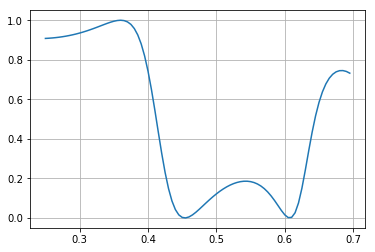

In [47]:
plt.plot(xy[:,0], xy[:,1])
plt.grid()
plt.show()